### INITIAL STEPS

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
import os
os.sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

### TESTING ON PRETRAINED CLASSIFIER

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
IMAGE_SHAPE

(224, 224)

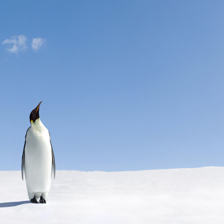

In [ ]:
penguin = Image.open("/content/drive/MyDrive/TL101/penguin.jpg").resize(IMAGE_SHAPE)
penguin

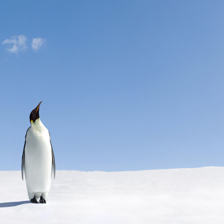

In [ ]:
penguin

In [ ]:
penguin = np.array(penguin)/255

In [ ]:
penguin.shape

(224, 224, 3)

In [ ]:
penguin[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(penguin[np.newaxis, ...])
result.shape


(1, 1001)

In [ ]:
result

array([[ 0.18890283, -0.3481757 , -1.1468923 , ..., -1.3755319 ,
         0.12681657, -0.32398754]], dtype=float32)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

146

In [ ]:
tf.keras.utils.get_file('/content/drive/MyDrive/TL101/ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')


'/content/drive/MyDrive/TL101/ImageNetLabels.txt'

In [ ]:
image_labels = []
with open("/content/drive/MyDrive/TL101/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [ ]:
image_labels[predicted_label_index] 

'king penguin'

###GETTING ESSENTIALS

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('/content/drive/MyDrive/TL101/datasets/flower_photos',origin=dataset_url, cache_dir =".", untar=True)
data_dir

'/content/drive/MyDrive/TL101/datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/15030133005_9728102622_z.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/20410697750_c43973d1eb.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/15191613243_82ee8e0fe8.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/15026703621_e15e9d55f0_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/da

In [ ]:
all_images = list(data_dir.glob('*/*.jpg'))
image_count = len(all_images)

In [ ]:
image_count

3670

In [ ]:
type(all_images)

list

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:10]

[PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/3500121696_5b6a69effb_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/3751835302_d5a03f55e8_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/roses/3997609936_8db20b7141_n.jpg

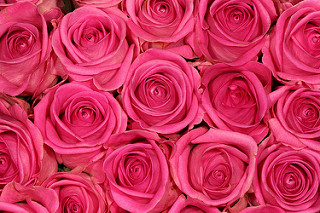

In [ ]:
Image.open(roses[123])

In [ ]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers[:10]

[PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/15030133005_9728102622_z.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/20410697750_c43973d1eb.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/15191613243_82ee8e0fe8.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/datasets/flower_photos/sunflowers/15026703621_e15e9d55f0_n.jpg'),
 PosixPath('/content/drive/MyDrive/TL101/da

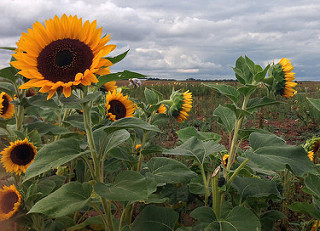

In [ ]:
Image.open(sunflowers[15])

In [5]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [ ]:
flower_images_dict['roses']

In [6]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flower_images_dict['roses'][0])

'/content/drive/MyDrive/TL101/datasets/flower_photos/roses/7345657862_689366e79a.jpg'

In [8]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [ ]:
img

array([[[  0,   3,   1],
        [  1,   4,   2],
        [  0,   2,   0],
        ...,
        [ 48,  90,  55],
        [ 46,  93,  54],
        [ 47,  97,  55]],

       [[  3,   6,   4],
        [  2,   5,   3],
        [  3,   6,   4],
        ...,
        [ 48,  96,  54],
        [ 49,  99,  57],
        [ 49, 102,  58]],

       [[  1,   4,   2],
        [  0,   2,   0],
        [  4,   7,   5],
        ...,
        [ 52,  99,  61],
        [ 53, 101,  65],
        [ 51, 102,  65]],

       ...,

       [[ 31,  44,  28],
        [ 26,  43,  29],
        [ 20,  39,  24],
        ...,
        [ 71,  83,  89],
        [ 69,  77,  77],
        [ 65,  63,  63]],

       [[ 21,  36,  22],
        [ 15,  36,  21],
        [ 21,  39,  22],
        ...,
        [ 77,  80,  88],
        [ 69,  72,  77],
        [ 58,  62,  63]],

       [[ 17,  33,  16],
        [ 12,  34,  15],
        [ 17,  36,  15],
        ...,
        [ 75,  78,  86],
        [ 68,  71,  76],
        [ 56,  60,  61]]

In [ ]:
img.shape

(322, 500, 3)

In [9]:
IMAGE_SHAPE = (224,224)
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
for flo_name, images in flower_images_dict.items():
    print(flo_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
from skimage import io

In [ ]:
for flower_name, images in flower_images_dict.items():
      print(flower_name)

roses
daisy
dandelion
sunflowers
tulips


In [10]:
X, y = [],[]
group = 0
for flower_name, images in flower_images_dict.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(IMAGE_SHAPE))
      X.append(resized_img)
      y.append(flower_labels_dict[flower_name])
    group+=1
    print('Resizing group ' + str(group))


Resizing group 1
Resizing group 2
Resizing group 3
Resizing group 4
Resizing group 5


In [ ]:
len(X)


3670

In [ ]:
resized_img

In [ ]:
 img = cv2.imread(str(flower_images_dict['roses'][0]))
 resized_img = cv2.resize(img,(IMAGE_SHAPE))

 resized_img.shape

(224, 224, 3)

In [ ]:
for flower_name, images in flower_images_dict.items():
  print(flower_name)

roses
daisy
dandelion
sunflowers
tulips


In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split #75-25
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
len(X_train)
y_test
#len(X_test)

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 3, 0, 2, 4, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 4, 4, 4, 4,
       2, 3, 3, 3, 2, 1, 0, 0, 2, 4, 1, 2, 0, 3, 4, 4, 0, 2, 4, 4, 2, 3,
       2, 0, 4, 4, 2, 2, 2, 0, 1, 0, 4, 1, 2, 0, 4, 2, 3, 1, 1, 4, 2, 3,
       0, 2, 0, 2, 2, 4, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 2, 0, 1, 0, 0,
       1, 0, 3, 3, 4, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 2, 2, 0, 4, 2, 3, 0,
       4, 1, 0, 1, 3, 4, 3, 3, 3, 0, 4, 0, 2, 1, 0, 3, 2, 2, 4, 2, 0, 2,
       0, 1, 4, 2, 2, 0, 3, 0, 1, 4, 0, 3, 0, 1, 4, 0, 4, 4, 0, 0, 0, 4,
       3, 1, 4, 3, 2, 2, 4, 1, 1, 4, 2, 2, 2, 2, 4, 3, 2, 1, 4, 4, 2, 4,
       3, 2, 4, 2, 2, 4, 4, 0, 2, 2, 4, 0, 3, 3, 2, 3, 0, 1, 0, 0, 0, 4,
       0, 2, 2, 4, 1, 2, 1, 2, 3, 3, 0, 1, 0, 3, 2, 2, 1, 3, 3, 4, 4, 4,
       2, 3, 2, 0, 0, 0, 4, 3, 4, 0, 0, 2, 0, 3, 0, 1, 0, 2, 2, 1, 3, 4,
       1, 0, 2, 1, 3, 0, 4, 2, 4, 1, 4, 0, 0, 1, 2, 0, 0, 3, 3, 4, 1, 4,
       4, 2, 2, 1, 2, 1, 2, 4, 2, 1, 4, 4, 0, 1, 4,

In [25]:
X_test_scaled  = X_test / 255

In [14]:
X_train_scaled = X_train / 255

### BUILDING MY OWN MODEL FOR CLASSIFICATION

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile( optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
86/86 [==============================] - 119s 1s/step - loss: 1.5305 - accuracy: 0.3670
Epoch 2/20
86/86 [==============================] - 118s 1s/step - loss: 1.0786 - accuracy: 0.5803
Epoch 3/20
86/86 [==============================] - 118s 1s/step - loss: 0.8584 - accuracy: 0.6766
Epoch 4/20
86/86 [==============================] - 116s 1s/step - loss: 0.6275 - accuracy: 0.7718
Epoch 5/20
86/86 [==============================] - 122s 1s/step - loss: 0.3901 - accuracy: 0.8648
Epoch 6/20
86/86 [==============================] - 123s 1s/step - loss: 0.2173 - accuracy: 0.9313
Epoch 7/20
86/86 [==============================] - 119s 1s/step - loss: 0.1237 - accuracy: 0.9629
Epoch 8/20
86/86 [==============================] - 119s 1s/step - loss: 0.0627 - accuracy: 0.9818
Epoch 9/20
86/86 [==============================] - 120s 1s/step - loss: 0.0448 - accuracy: 0.9887
Epoch 10/20
86/86 [==============================] - 120s 1s/step - loss: 0.0411 - accuracy: 0.9887
Epoch 11/

### SAVING MODEL 

In [ ]:
model.save('/content/drive/MyDrive/TL101/saved_model/20EPOCHSCUSTOM')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TL101/saved_model/20EPOCHSCUSTOM/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TL101/saved_model/20EPOCHSCUSTOM/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/TL101/saved_model/20EPOCHSCUSTOM')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (32, 224, 224, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 112, 112, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 112, 112, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 56, 56, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 56, 56, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 28, 28, 64)        

### EVALUATING MODEL

In [ ]:
model.evaluate(X_train_scaled,y_train)

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 387ms/step - loss: 2.6225 - accuracy: 0.5980


[2.6224634647369385, 0.5980392098426819]

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
len(predictions)

918

In [ ]:
score = tf.nn.softmax(predictions[10])

In [ ]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.8367817e-01, 1.5070741e-01, 4.9509766e-04, 5.8731124e-02,
       6.3881050e-03], dtype=float32)>

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[10]


1

###DATA AUGMENTATION


In [ ]:
img_height, img_width = 224, 224

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

(-0.5, 223.5, 223.5, -0.5)

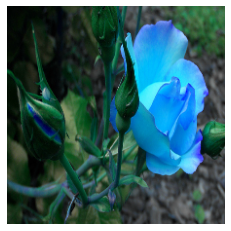

In [ ]:
plt.imshow(X[0])
plt.axis('off')

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[99])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

### BUILDING MY OWN MODEL ADDING DATA AUGMENTATION IN THE MODEL

In [ ]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile( optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
)

history = model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
86/86 [==============================] - 150s 2s/step - loss: 1.5420 - accuracy: 0.3434
Epoch 2/20
86/86 [==============================] - 149s 2s/step - loss: 1.1548 - accuracy: 0.5047
Epoch 3/20
86/86 [==============================] - 149s 2s/step - loss: 1.0203 - accuracy: 0.6021
Epoch 4/20
86/86 [==============================] - 148s 2s/step - loss: 0.9347 - accuracy: 0.6381
Epoch 5/20
86/86 [==============================] - 148s 2s/step - loss: 0.8520 - accuracy: 0.6770
Epoch 6/20
86/86 [==============================] - 148s 2s/step - loss: 0.7856 - accuracy: 0.6966
Epoch 7/20
86/86 [==============================] - 148s 2s/step - loss: 0.7277 - accuracy: 0.7246
Epoch 8/20
86/86 [==============================] - 148s 2s/step - loss: 0.7138 - accuracy: 0.7188
Epoch 9/20
86/86 [==============================] - 148s 2s/step - loss: 0.6631 - accuracy: 0.7478
Epoch 10/20
86/86 [==============================] - 147s 2s/step - loss: 0.6146 - accuracy: 0.7700
Epoch 11/

Both the sparse categorical cross-entropy (SCE) and the categorical cross-entropy (CCE) **can be greater than 1.** By the way, they are the same exact loss function: the only difference is really the implementation, where the SCE assumes that the labels (or classes) are given as integers, while the CCE assumes that the labels are given as one-hot vectors

the cross-entropy is not bound in any specific range, its just positive (> 0).

Keras binary_crossentropy first convert your predicted probability to logits. Then it uses tf.nn.sigmoid_cross_entropy_with_logits to calculate cross entropy and return to you the mean of that. Mathematically speaking, if your label is 1 and your predicted probability is low (like 0.1), the cross entropy can be greater than 1, like losses.binary_crossentropy(tf.constant([1.]), tf.constant([0.1])).

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 14s 463ms/step - loss: 0.9924 - accuracy: 0.6885


[0.9923896789550781, 0.6884531378746033]

In [ ]:
len(history.history['accuracy'])

20

In [ ]:
epochs = range(20)
epochs

range(0, 20)

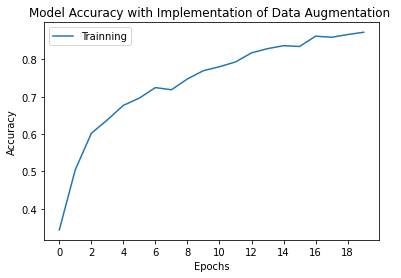

In [ ]:
import matplotlib.pyplot as plt
ax = plt.gca()
#ax.set_xlim([0, 20])
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.set_ylim([ymin, ymax])
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy with Implementation of Data Augmentation ')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Trainning'],loc = 'upper left')
plt.show()

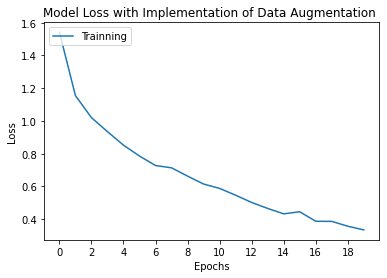

In [ ]:
import matplotlib.pyplot as plt
ax = plt.gca()
#ax.set_xlim([0, 20])
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.set_ylim([ymin, ymax])
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.plot(history.history['loss'])
plt.title('Model Loss with Implementation of Data Augmentation ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Trainning'],loc = 'upper left')
plt.show()

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('/content/drive/MyDrive/TL101/saved_model/20EpochswithDAonly/test1/test.py') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TL101/saved_model/20EpochswithDAonly/test1/test.py/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TL101/saved_model/20EpochswithDAonly/test1/test.py/assets


Didn't work as expected


In [ ]:

#model.save('/content/drive/MyDrive/TL101/saved_model/20EpochswithDAonly')
model.save("/content/drive/MyDrive/TL101/saved_model/20EpochswithDAonly/test", save_format='h5')


In [ ]:
from tensorflow import keras
new_model = keras.models.load_model('/content/drive/MyDrive/TL101/saved_model/20EpochswithDAonly/test1/test.py')

In [ ]:
loss, acc = new_model.evaluate(X_test_scaled,y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

29/29 - 12s - loss: 0.9924 - accuracy: 0.6885 - 12s/epoch - 425ms/step
Restored model, accuracy: 68.85%


In [ ]:
new_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)       

In [ ]:
new_model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 428ms/step - loss: 0.9924 - accuracy: 0.6885


[0.9923896789550781, 0.6884531378746033]

In [ ]:
len(predictions)

In [ ]:
score = tf.nn.softmax(predictions[5])

In [ ]:
np.argmax(score)

In [ ]:
y_test[4]

In [ ]:
image.open[roses[4]]

### Defining all but LAST layer of the model

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_topLayer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3),trainable = False)


### Creating Custom Model adding all the layers and the last custom layer

In [ ]:
num_of_flowers = 5

final_model = tf.keras.Sequential([
  pretrained_model_without_topLayer,
  tf.keras.layers.Dense(num_of_flowers)                                 
])

final_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
final_model.compile( optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
)

history1 = final_model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 80s 884ms/step - loss: 0.8042 - accuracy: 0.6980
Epoch 2/10
86/86 [==============================] - 76s 884ms/step - loss: 0.4166 - accuracy: 0.8572
Epoch 3/10
86/86 [==============================] - 77s 890ms/step - loss: 0.3199 - accuracy: 0.8986
Epoch 4/10
86/86 [==============================] - 77s 892ms/step - loss: 0.2744 - accuracy: 0.9179
Epoch 5/10
86/86 [==============================] - 77s 891ms/step - loss: 0.2337 - accuracy: 0.9288
Epoch 6/10
86/86 [==============================] - 76s 885ms/step - loss: 0.2039 - accuracy: 0.9430
Epoch 7/10
86/86 [==============================] - 76s 889ms/step - loss: 0.1860 - accuracy: 0.9477
Epoch 8/10
86/86 [==============================] - 76s 889ms/step - loss: 0.1648 - accuracy: 0.9575
Epoch 9/10
86/86 [==============================] - 76s 885ms/step - loss: 0.1468 - accuracy: 0.9640
Epoch 10/10
86/86 [==============================] - 77s 897ms/step - loss: 0.1314 - accura

In [ ]:
loss, acc = final_model.evaluate(X_test_scaled,y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

29/29 - 26s - loss: 0.3353 - accuracy: 0.8856 - 26s/epoch - 886ms/step
Restored model, accuracy: 88.56%


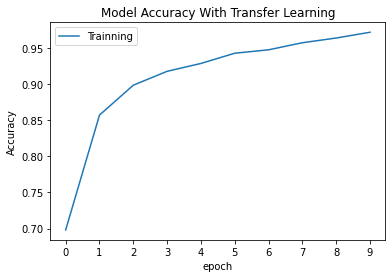

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
ax = plt.gca()
#ax.set_xlim([0, 20])
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.set_ylim([ymin, ymax])


loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)


plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy With Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Trainning'],loc = 'upper left')
plt.show()

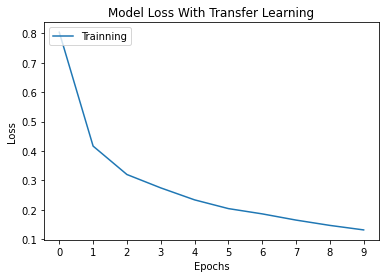

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
ax = plt.gca()
#ax.set_xlim([0, 20])
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.set_ylim([ymin, ymax])


loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)


plt.plot(history1.history['loss'])
plt.title('Model Loss With Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Trainning'],loc = 'upper left')
plt.show()

### Adding Augmentation Part To the Model

In [ ]:
num_of_flowers = 5

final_model = tf.keras.Sequential([
  data_augmentation,
  pretrained_model_without_topLayer,
  tf.keras.layers.Dense(num_of_flowers)                                 
])

In [ ]:
final_model.compile( optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
)

history1 = final_model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 96s 1s/step - loss: 0.8758 - accuracy: 0.6737
Epoch 2/10
86/86 [==============================] - 92s 1s/step - loss: 0.5007 - accuracy: 0.8216
Epoch 3/10
86/86 [==============================] - 92s 1s/step - loss: 0.4158 - accuracy: 0.8586
Epoch 4/10
86/86 [==============================] - 93s 1s/step - loss: 0.3709 - accuracy: 0.8768
Epoch 5/10
86/86 [==============================] - 93s 1s/step - loss: 0.3373 - accuracy: 0.8790
Epoch 6/10
86/86 [==============================] - 92s 1s/step - loss: 0.3055 - accuracy: 0.8946
Epoch 7/10
86/86 [==============================] - 91s 1s/step - loss: 0.2728 - accuracy: 0.9077
Epoch 8/10
86/86 [==============================] - 92s 1s/step - loss: 0.2601 - accuracy: 0.9117
Epoch 9/10
86/86 [==============================] - 92s 1s/step - loss: 0.2580 - accuracy: 0.9150
Epoch 10/10
86/86 [==============================] - 92s 1s/step - loss: 0.2400 - accuracy: 0.9204


In [ ]:
final_model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 28s 920ms/step - loss: 0.3732 - accuracy: 0.8682


[0.373196542263031, 0.8681917190551758]

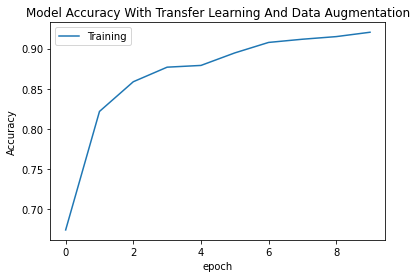

In [ ]:

plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy With Transfer Learning And Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training'],loc = 'upper left')
plt.show()

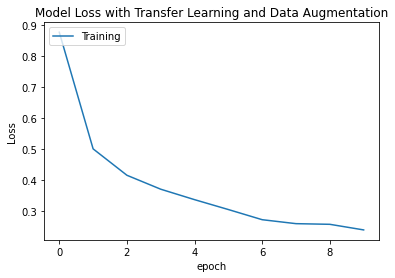

In [ ]:
plt.plot(history1.history['loss'])
plt.title('Model Loss with Transfer Learning and Data Augmentation')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training'],loc = 'upper left')
plt.show()

##PREDICTIONS

In [ ]:
pwd

'/content'

In [ ]:
from keras.models import save_model, load_model

save_model(final_model,'/content/drive/MyDrive/TL101/saved_model/final_10/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TL101/saved_model/final_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TL101/saved_model/final_10/assets


In [ ]:
#new_model = load_model('my_model.h5')

### Trying for a single sample


In [ ]:
model = load_model('/content/drive/MyDrive/TL101/saved_model/final/')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
IMAGE_SHAPE = (224,224)
#imageToPredict = Image.open("/content/drive/MyDrive/TL101/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg").resize(IMAGE_SHAPE)
imageToPredict = Image.open("/content/drive/MyDrive/TL101/rose.jpg").resize(IMAGE_SHAPE)
#imageToPredict = Image.open("/content/drive/MyDrive/TL101/tulips.jpg").resize(IMAGE_SHAPE)
#imageToPredict = Image.open("/content/drive/MyDrive/TL101/sunflower1.jpg").resize(IMAGE_SHAPE)
#imageToPredict = Image.open("/content/drive/MyDrive/TL101/rose.jpg").resize(IMAGE_SHAPE)
imageToPredict = np.array(imageToPredict)/255
op = model.predict(imageToPredict[np.newaxis,...])
predicted_index = np.argmax(op)
# to print keys using values
print(list(flower_labels_dict.keys())[list(flower_labels_dict.values()).index(predicted_index)])

roses


In [ ]:
op

array([[ 1.2957   , -5.1239305, -1.1021883, -2.544357 , -3.1679425]],
      dtype=float32)

###REST OF THE CODE!!!

In [ ]:
final_model.evaluate(X_test_scaled,y_test)

RuntimeError: ignored

###PREDICTIONS USING CUSTOM TL MODEL

In [ ]:
pred = model.predict(X)

In [ ]:
score = tf.nn.softmax(pred[19])
predicted_label = np.argmax(score)
key_list = list(flower_labels_dict.keys())
print(key_list[predicted_label])

In [ ]:
plt.axis('off')
plt.imshow(X[19])

###PREDICTIONS USING CUSTOM TL+DA MODEL

In [ ]:
predictions = final_model.predict(X)

In [ ]:
len(predictions)

In [ ]:
score = tf.nn.softmax(predictions[1212])

In [ ]:
predicted_label = np.argmax(score)
key_list = list(flower_labels_dict.keys())
print(key_list[predicted_label])


In [ ]:
plt.axis('off')
plt.imshow(X[1212])

In [ ]:
score = tf.nn.softmax(predictions[2633])
predicted_label = np.argmax(score)
key_list = list(flower_labels_dict.keys())
print(key_list[predicted_label])

In [ ]:
plt.axis('off')
plt.imshow(X[2633])

#GUI

In [ ]:

from tkinter import *
from PIL import Image, ImageTk
from tkinter import filedialog
import tkinter.font as font


window = Tk()

def imageBOX(location):
    global img1,img2
    img1 = Image.open(location)
    img1.resize((300,300))  
    img2 = ImageTk.PhotoImage(img1)
    imgBox = Label(window, text = location, image = img2)
    imgBox.place( x = 470, y = 250,width = 300, height = 300)


def btn_clicked():
    window.filename = filedialog.askopenfilename(initialdir="C:\\Users\\uSer\\datasets\\flower_photos",title = "Select an image",filetypes = (("jpg files","*.jpg"),("png files","*.png"),("all files","*.*")))
    imageLocation = window.filename
    loadedFileLabel = Label(window,text = window.filename,bg="#a8f0b6").place(x = 470, y = 190,width = 350,height = 51)
    imageBOX(imageLocation)


    


window.geometry("1000x600")
window.configure(bg = "#f9f7f1")
window.title("DEMO")
window.iconbitmap("gui\\icon.ico")
canvas = Canvas(
    window,
    bg = "#f9f7f1",
    height = 600,
    width = 1000,
    bd = 0,
    highlightthickness = 0,
    relief = "ridge")
canvas.place(x = 0, y = 0)

b_img = Image.open("gui\\background.png")
background_img = ImageTk.PhotoImage(b_img)
background = canvas.create_image(495.0, 310.0,image=background_img)

img = Image.open("gui\\img0.png")
img0 = ImageTk.PhotoImage(img)


myFont = font.Font(family='Helvetica',size = 18)

b0 = Button(
    bg = "#2df755",
    fg = "#ffffff",
    text = "BROWSE",
    font = myFont,
    borderwidth = 0,
    highlightthickness = 0,
    command = btn_clicked,
    relief = "flat")


btn_predict = Button(
    bg = "#2df755",
    fg = "#ffffff",
    text = "PREDICT",
    font = myFont,
    borderwidth = 0,
    highlightthickness = 0,
    command = window.quit(),
    relief = "ridge")

btn_predict.place(  x = 850, y = 500,
    width = 119,
    height = 51)


b1 = Button(
    bg="#a8f0b6",
    borderwidth = 0,
    highlightthickness = 0,
    state= "disabled",
    relief = "flat")

b0.place(
    x = 850, y = 190,
    width = 119,
    height = 51)



b1.place(
    x = 470, y = 190,
    width = 350,
    height = 51)



window.resizable(False, False)
window.mainloop()


###NEW METRICES


In [17]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/TL101/saved_model/final_10/')

In [28]:
predictions = model.predict(X_test_scaled)

In [29]:
predictions

array([[-5.31219   ,  4.997255  , -3.1090484 , -0.7932393 , -3.9068007 ],
       [ 6.5863047 , -6.3936486 , -6.830147  , -3.0572958 , -2.5542946 ],
       [-3.834427  , -5.857437  ,  7.323525  , -1.9234158 , -4.1383076 ],
       ...,
       [-3.2409074 , -2.444449  , -2.081216  ,  3.9177556 , -4.0714927 ],
       [ 4.6009154 , -6.464005  , -7.373087  , -4.223791  ,  1.6928891 ],
       [-4.1159244 ,  0.15037361, -3.5024493 ,  4.60417   , -6.693327  ]],
      dtype=float32)

In [31]:
score = tf.nn.softmax(predictions)
score

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[3.31998417e-05, 9.96485233e-01, 3.00571730e-04, 3.04572936e-03,
        1.35359471e-04],
       [9.99824226e-01, 2.30569231e-06, 1.49015989e-06, 6.48277928e-05,
        1.07204214e-04],
       [1.42596700e-05, 1.88593913e-06, 9.99876976e-01, 9.63942875e-05,
        1.05229174e-05],
       ...,
       [7.73973705e-04, 1.71642017e-03, 2.46816128e-03, 9.94704187e-01,
        3.37293139e-04],
       [9.48089838e-01, 1.48393747e-05, 5.97869166e-06, 1.39420910e-04,
        5.17499298e-02],
       [1.61317934e-04, 1.14950910e-02, 2.97928345e-04, 9.88033414e-01,
        1.22555020e-05]], dtype=float32)>

In [35]:
y_pred = []
for item in score:
  y_pred.append(np.argmax(item))
len(y_pred)
len(y_test)


918

In [36]:
len(y_pred)

918

In [37]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[155   4   0   4  13]
 [  4 132   5   7   6]
 [  6   9 195  10   6]
 [  6   4   2 125  13]
 [ 16   3   0   3 190]]


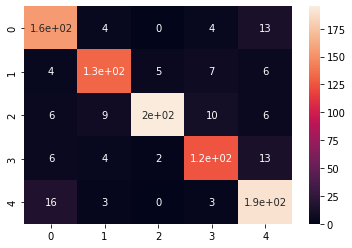

In [40]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [44]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

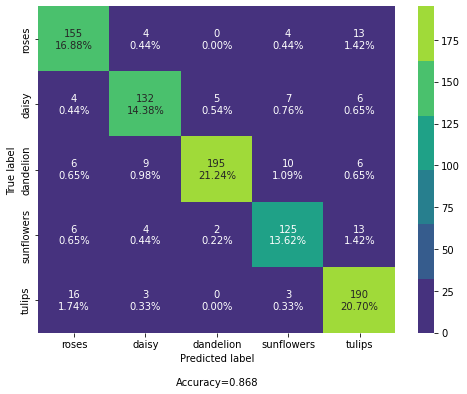

In [60]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['roses',
    'daisy',
    'dandelion',
    'sunflowers',
    'tulips']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories,figsize = (8,6),
                      cmap = sns.color_palette('viridis')
                      )